# Лабораторная №4. Снижение размерности признакового пространства методом главных факторов.

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as ss
import seaborn as sns

from math import  sin, cos, pi 
from statsmodels.formula.api import ols
from scipy.stats import chi2
from numpy import arange
from pandas import ExcelWriter

In [2]:
writer = ExcelWriter('4lab_result_9.xlsx')

### Считывание данных

In [3]:
#features =["X7", "X15", "X17", "X23", "X27"] 
#features =["X6", "X16", "X26", "X31", "X39"] 
#f_len = len (features)
#r'C:\Games\Ekonometrika\data_for_3_and_4.xlsx'
#r'C:\Jypiter\Uchebnaya_tablitsa_dlya_issledovania.xlsx'
#unclr_data = pd.read_excel (r'C:\Games\Ekonometrika\data_for_3_and_4_sok.xlsx').loc[:,features]

#unclr_data = pd.read_excel (r'C:\Jypiter\Uchebnaya_tablitsa_dlya_issledovania_2.xlsx').loc[:,:]
#unclr_data = unclr_data.drop(['bad'], axis=1)

unclr_data = pd.read_excel (r'C:\Jypiter\Panel_po_KO_01_2016_shifr.xlsx')
ind = unclr_data['КО']
unclr_data = unclr_data.iloc[:,13:].set_index(ind)


features = list(unclr_data.columns.values)
unclr_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33
КО,,,,,,,,,,,,,,,,,,,,,
КО1,2156,32.931354,67.486085,6.941581,0.092764,2.551020,1,1,1,2,...,1.306287,0.023917,0.219521,0.001457,7.475206e+10,38.882476,3.048935e+09,84.485423,121,16.528926
КО2,42,7.142857,92.857143,15.384615,0.000000,0.000000,3,1,1,2,...,18.463882,0.000000,0.000000,0.000000,1.947736e+07,39.002186,6.615199e+07,94.129156,2,0.000000
КО3,116,12.931034,87.068966,10.891089,0.000000,1.724138,1,1,2,2,...,5.490532,0.000000,0.000000,0.000000,9.581336e+08,11.778609,9.114098e+07,91.606410,13,7.692308
КО4,148,9.459459,91.891892,29.411765,0.000000,0.675676,4,1,1,1,...,43.068261,0.077610,0.000000,0.000000,2.688957e+08,37.318897,2.399071e+09,5.447538,0,0.000000
КО5,355,13.521127,86.760563,9.415584,0.281690,0.563380,2,1,1,2,...,12.360450,0.093484,0.005492,0.000000,7.351083e+08,80.052858,5.011699e+08,97.045228,11,0.000000


In [4]:
for nun in features:
    if unclr_data[nun].dtypes == 'object':
        unclr_data = unclr_data.drop([nun], axis=1)

features = list(unclr_data.columns.values)
f_len = len (features) 
        
unclr_data.to_excel(writer,'data')
unclr_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33
КО,,,,,,,,,,,,,,,,,,,,,
КО1,2156,32.931354,67.486085,6.941581,0.092764,2.551020,1,1,1,2,...,1.306287,0.023917,0.219521,0.001457,7.475206e+10,38.882476,3.048935e+09,84.485423,121,16.528926
КО2,42,7.142857,92.857143,15.384615,0.000000,0.000000,3,1,1,2,...,18.463882,0.000000,0.000000,0.000000,1.947736e+07,39.002186,6.615199e+07,94.129156,2,0.000000
КО3,116,12.931034,87.068966,10.891089,0.000000,1.724138,1,1,2,2,...,5.490532,0.000000,0.000000,0.000000,9.581336e+08,11.778609,9.114098e+07,91.606410,13,7.692308
КО4,148,9.459459,91.891892,29.411765,0.000000,0.675676,4,1,1,1,...,43.068261,0.077610,0.000000,0.000000,2.688957e+08,37.318897,2.399071e+09,5.447538,0,0.000000
КО5,355,13.521127,86.760563,9.415584,0.281690,0.563380,2,1,1,2,...,12.360450,0.093484,0.005492,0.000000,7.351083e+08,80.052858,5.011699e+08,97.045228,11,0.000000


In [5]:
val = []
i = 0
for name in features:
    #print(name)
    val.append(unclr_data.columns[i].replace(name,'X'+str(i+1)))
    i = i+1
unclr_data.columns = val

features = list(unclr_data.columns.values)

In [6]:
unsc_data = unclr_data[unclr_data!='-'].dropna().astype('float64') # для которых нет значений, удаляем, потом стандартизуем
index = unsc_data.index #записываем в переменную index названия строк исходной матрицы
columns = unsc_data.columns #записываем в переменную columns названия столбцов исходной матрицы

scaled = (unsc_data - unsc_data.mean(axis=0))/unsc_data.std()
data = pd.DataFrame(scaled, columns=columns, index=index) 

#data.to_excel(writer,'data_x')
###writer.save()
data.head()

C:\Programs\Anaconda\Anaconda\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
КО,,,,,,,,,,,,,,,,,,,,,
КО1,0.309704,0.781124,-0.470976,-0.320911,-0.259934,0.136453,-0.766250,-0.351225,-0.651128,-0.416355,...,-0.693854,-0.143935,-0.071364,-0.083293,0.277134,-0.571223,0.175237,0.345388,0.820621,0.658203
КО2,-0.103481,-0.566717,0.570217,0.377238,-0.300096,-0.227394,0.680023,-0.351225,-0.651128,-0.416355,...,0.186093,-0.150098,-0.128462,-0.084047,-0.104947,-0.567533,-0.102926,0.629376,-0.118493,-0.294956
КО3,-0.089017,-0.264197,0.332678,0.005671,-0.300096,0.018517,-0.766250,-0.351225,0.166104,-0.416355,...,-0.479260,-0.150098,-0.128462,-0.084047,-0.100148,-1.406855,-0.100596,0.555086,-0.031685,0.148630
КО4,-0.082763,-0.445639,0.530604,1.537135,-0.300096,-0.131023,1.403159,-0.351225,-0.651128,-1.391815,...,1.447958,-0.130101,-0.128462,-0.084047,-0.103671,-0.619430,0.114633,-1.982117,-0.134277,-0.294956
КО5,-0.042304,-0.233355,0.320021,-0.116337,-0.178138,-0.147040,-0.043114,-0.351225,-0.651128,-0.416355,...,-0.126928,-0.126010,-0.127034,-0.084047,-0.101288,0.698089,-0.062358,0.715248,-0.047468,-0.294956


### Рассчитаем оценку корреляционной матрицы и проверим ее на значимость.

In [7]:
correlations = data.corr()

#correlations.to_excel(writer,'correlations')
###writer.save()
correlations

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
X1,1.000000,0.087933,-0.051126,-0.006730,-0.000610,-0.011558,-0.060567,-0.032866,-0.018122,-0.091087,...,-0.050367,-0.008619,0.003642,-0.006165,0.591244,-0.076591,0.986753,-0.082493,0.987832,0.014789
X2,0.087933,1.000000,-0.596800,-0.077465,-0.023053,-0.074467,-0.082833,0.023955,0.039289,-0.043533,...,-0.110560,0.062803,-0.033521,-0.031932,0.023816,-0.019087,0.083192,-0.072173,0.084645,0.047514
X3,-0.051126,-0.596800,1.000000,0.199135,0.062759,0.090002,0.301965,0.195156,0.204881,0.425572,...,0.201969,-0.012756,0.045696,0.036996,-0.002800,0.308188,-0.047430,0.404515,-0.045252,0.013119
X4,-0.006730,-0.077465,0.199135,1.000000,-0.086178,-0.091163,0.572547,0.106898,0.100722,0.135650,...,0.616772,-0.076126,0.051446,0.049275,-0.035402,0.154177,0.004287,0.111353,-0.012464,-0.043520
X5,-0.000610,-0.023053,0.062759,-0.086178,1.000000,0.001760,-0.072610,-0.007059,0.034217,0.015019,...,-0.077868,0.010034,-0.012045,-0.020481,0.019630,0.013147,-0.001708,0.072772,0.003151,-0.026716
X6,-0.011558,-0.074467,0.090002,-0.091163,0.001760,1.000000,-0.070299,0.093810,0.046675,0.080721,...,-0.101680,-0.025030,0.141406,0.004449,-0.007488,-0.043833,-0.004995,0.012355,-0.014797,-0.008006
X7,-0.060567,-0.082833,0.301965,0.572547,-0.072610,-0.070299,1.000000,0.171215,0.334329,0.198332,...,0.888100,0.130076,0.175167,0.126809,-0.078100,0.223073,-0.050585,0.170370,-0.072939,-0.049655
X8,-0.032866,0.023955,0.195156,0.106898,-0.007059,0.093810,0.171215,1.000000,0.527947,0.226755,...,0.144491,0.088670,0.071796,0.111151,0.007023,0.095281,-0.033485,0.174553,-0.039365,0.018027
X9,-0.018122,0.039289,0.204881,0.100722,0.034217,0.046675,0.334329,0.527947,1.000000,0.191479,...,0.271325,0.006139,0.118685,0.076172,0.015110,0.188948,-0.020027,0.201686,-0.024054,0.021530
X10,-0.091087,-0.043533,0.425572,0.135650,0.015019,0.080721,0.198332,0.226755,0.191479,1.000000,...,0.192823,-0.048424,0.005922,0.031218,-0.079358,0.699049,-0.089978,0.591493,-0.104615,0.108209


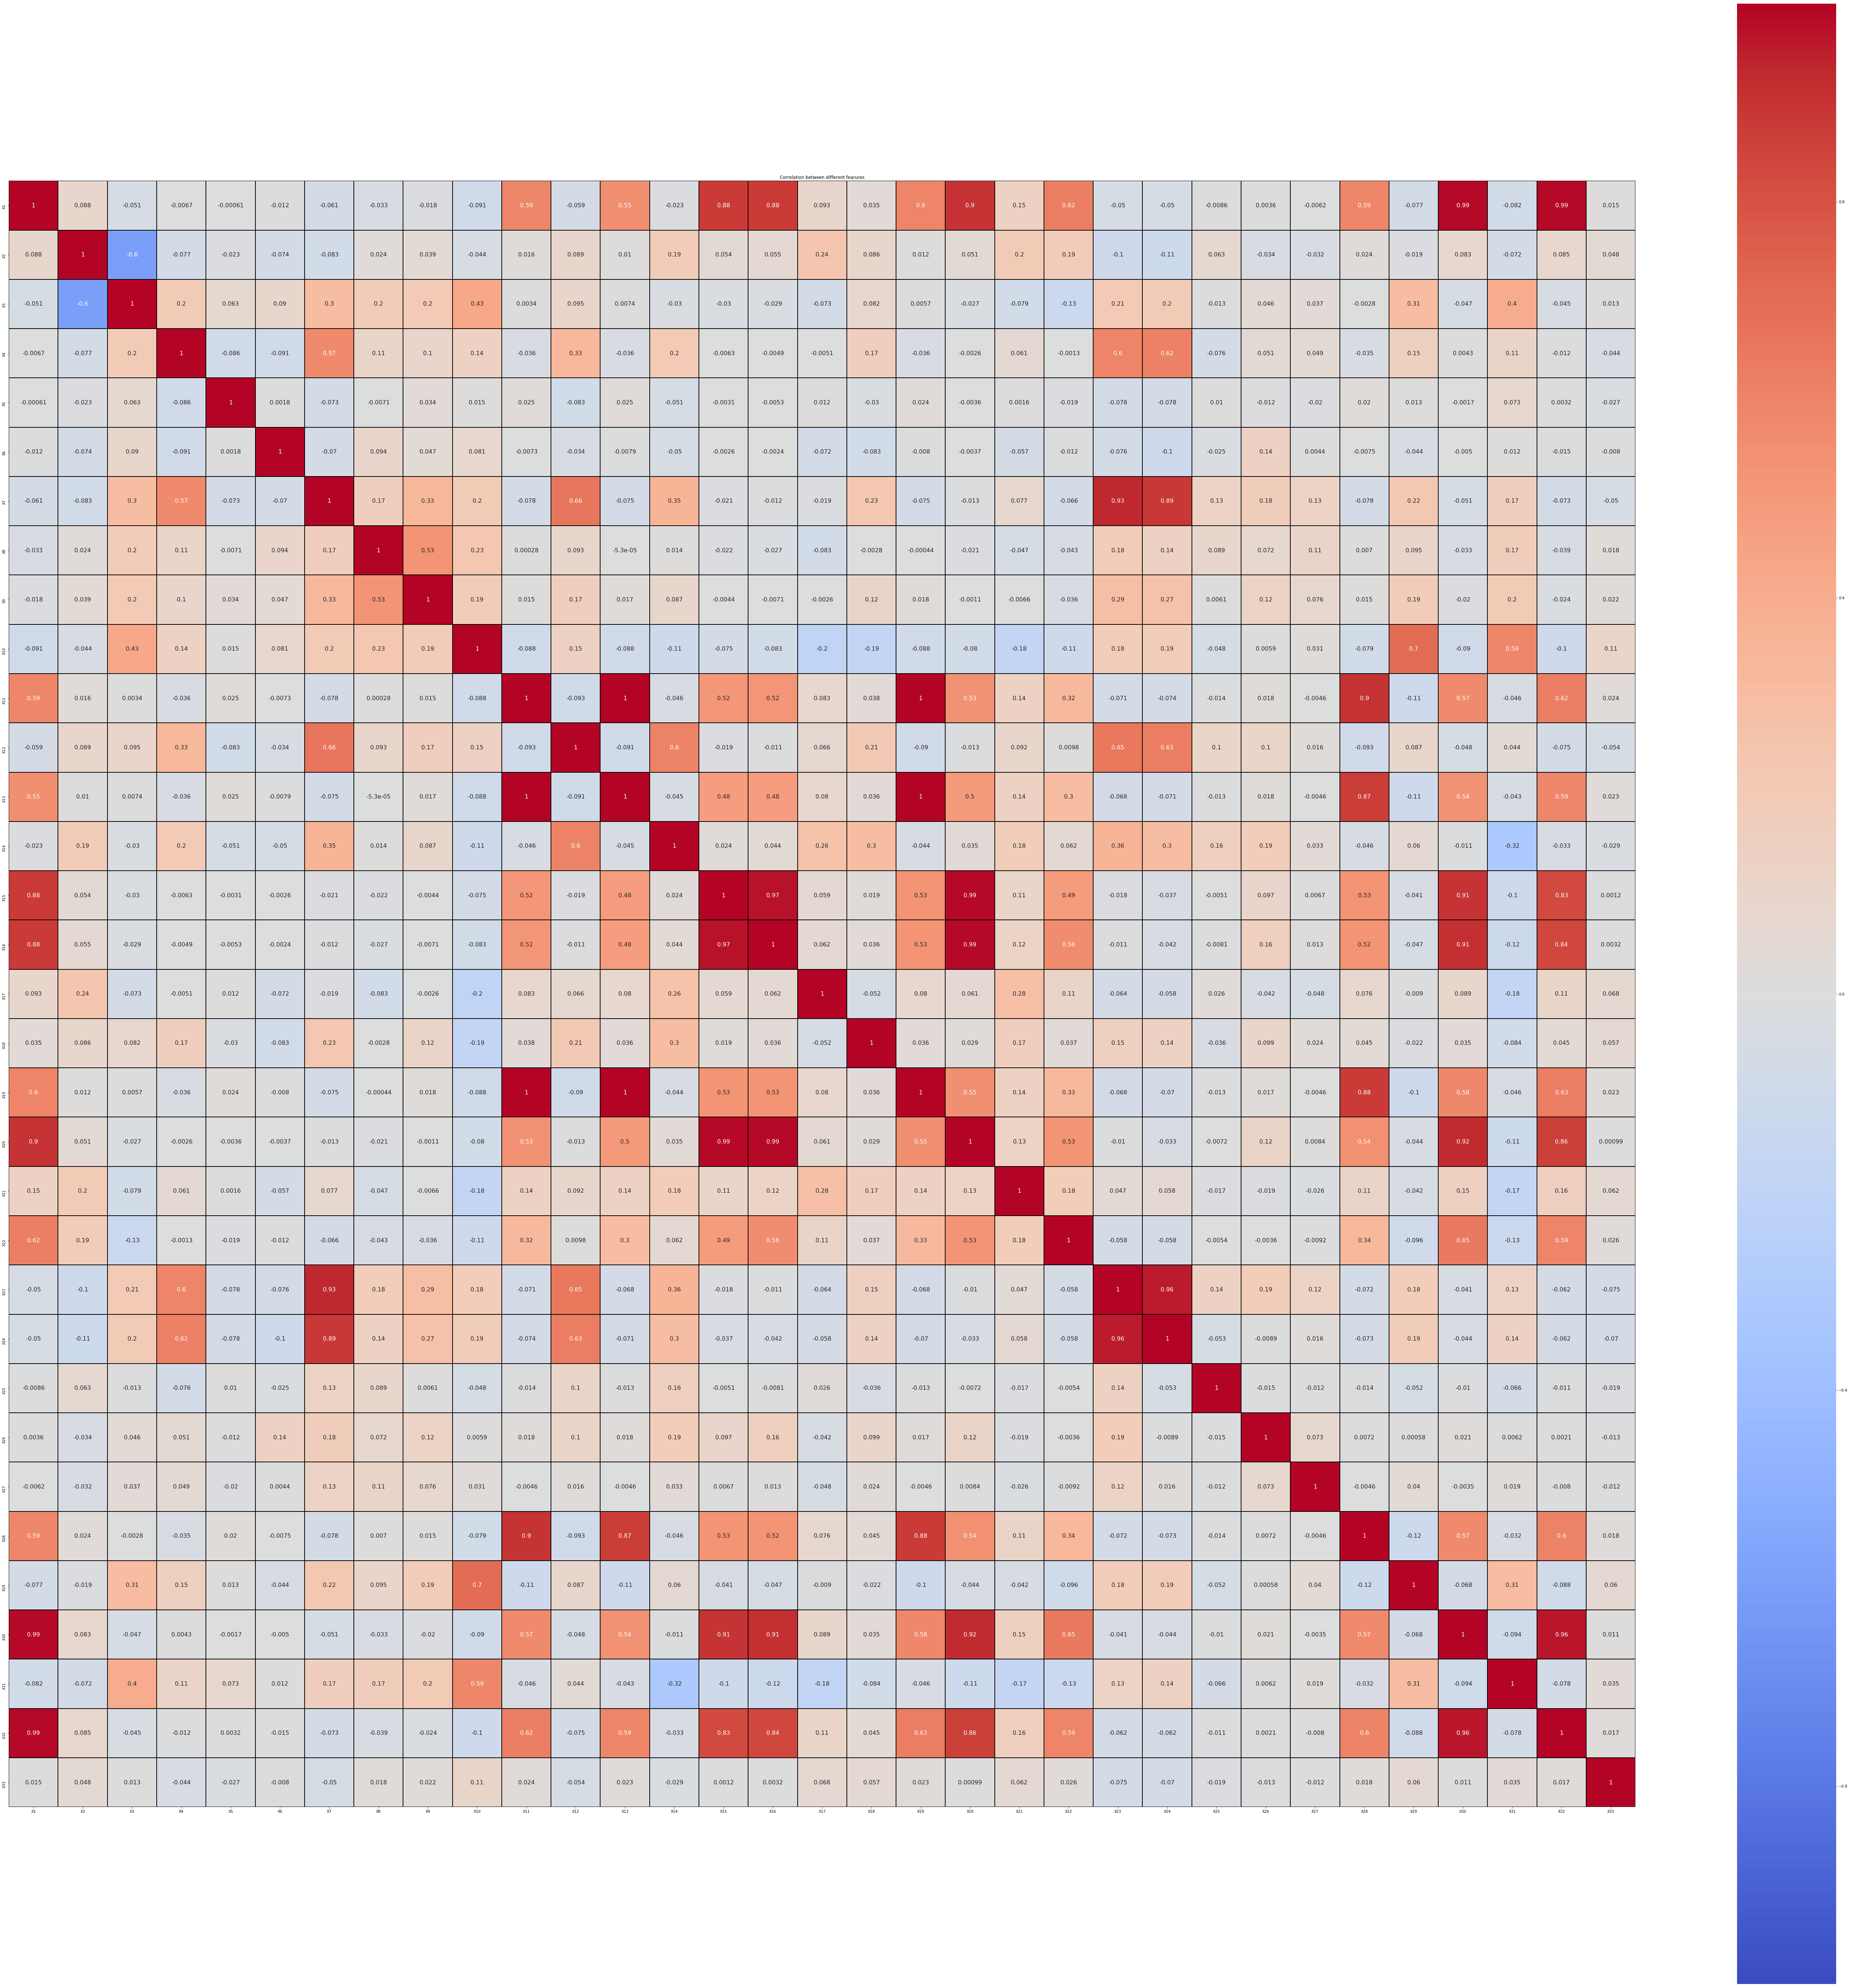

In [8]:
plt.figure(figsize=(100,100))
sns.heatmap(correlations, vmax=1,vmin=-1, center=0, square=True,annot=True,cmap='coolwarm',annot_kws={"size": 16}, 
            linewidths=1, linecolor='black')
plt.title('Correlation between different fearures')
plt.show()

Далее согласно алгоритму, предполагая, что выборка извлечена из нормально распределенной генеральной совокупности, на уровне значимости α = 0,05 проверим гипотезу о незначимости корреляционной матрицы.

In [9]:
#math.log(np.linalg.det(correlations), math.e)

abs(np.linalg.det(correlations))

5.032974831944884e-35

In [10]:
def chi_2(n,k,R):
    return -(n-1/6*(2*k+5))*math.log(abs(np.linalg.det(R)), math.e)

print(np.linalg.det(correlations)
      , data.shape[0] # n
      , data.shape[1] # k 
      , np.linalg.det, math.e)

-5.032974831944884e-35 738 33 <function det at 0x000001E7F9706A60> 2.718281828459045


In [11]:
chi_2_crt = chi_2(data.shape[0],data.shape[1],correlations)
print('Наблюдаемое значение составило',chi_2_crt)

Наблюдаемое значение составило 57348.62547322113


In [12]:
p_value=chi2.sf(chi_2_crt, data.shape[1]*(data.shape[1]-1)/2)
print ('Значение p-value равно','{0:.20f}'.format(p_value))

if p_value>0.05:
    print('Принимаем гипотезу, матрица парных коэффициентов корреляции незначима')
else:
    print('Отвергаем гипотезу, матрица парных коэффициентов корреляции значима')

Значение p-value равно 0.00000000000000000000
Отвергаем гипотезу, матрица парных коэффициентов корреляции значима


In [13]:
# Снижение размерности методом главных компонент.

## Рассчитаем оценки собственных чисел корреляционной матрицы.

In [14]:
uns_eigenvalues,eigenvectors=np.linalg.eig(correlations)
couple_lst=[]
for i in range(len(uns_eigenvalues)):
    couple_lst.append((uns_eigenvalues[i],eigenvectors[:,i]))
    
from operator import itemgetter
couple_lst = sorted(couple_lst, key = itemgetter(0),reverse=True)

#список со значениями оценок собственных чисел (eigenvalues), расположенных по убыванию
eigenvalues=sorted(uns_eigenvalues,reverse=True)

In [15]:
eig = pd.DataFrame(eigenvalues, index=list(range(1,f_len+1)), columns = ['eigenvalues'])

#eig.to_excel(writer,'eigenvalues')
###writer.save()
eig

,eigenvalues
1,8.044720e+00
2,4.528804e+00
3,2.752029e+00
4,1.961390e+00
5,1.574360e+00
6,1.431431e+00
7,1.203272e+00
8,1.128686e+00
9,1.074599e+00
10,9.999231e-01


## Доверительные интервалы для собственных значений

С вероятностью γ=0,95 построим доверительные интервалы для собственных чисел матрицы парных коэффициентов корреляции.
Доверительный интервал для i-ого собственного числа λi при большом объеме выборки имеет вид:

$$ \frac {\hat \lambda_i}{1 +  u_{\frac {1+\gamma} {2}} \sqrt {\frac {2}{n-1}} } < \lambda_i < \frac {\hat \lambda_i}{1 -  u_{\frac {1+\gamma} {2}} \sqrt {\frac {2}{n-1}} } $$ 

где $ u_{\frac {1+\gamma} {2}} $ – квантиль уровня $ \frac {1+\gamma}{2} $ стандартного нормального распределения
<br>
n – объем выборки.

In [16]:
def eigenval_left(l,n):
    return l/(1+ss.norm.ppf(0.975)*math.sqrt(2/(n-1))) #находим нижнюю границу интервала

def eigenval_right(l,n):
    return l/(1-ss.norm.ppf(0.975)*math.sqrt(2/(n-1))) #находим верхнюю границу интервала

conf_interval=np.empty((5, 3)) # создание матрицы для каждого из значений интервала и соответствующего ему собственного числа
for i in range(conf_interval.shape[0]):
    conf_interval[i,0]=eigenval_left(eigenvalues[i],data.shape[0])
    conf_interval[i,1]=eigenvalues[i]
    conf_interval[i,2]=eigenval_right(eigenvalues[i],data.shape[0])
    
conf_interval_df=pd.DataFrame(
    conf_interval,
    columns=['Нижняя граница','Собственное значение','Верхняя граница'])
conf_interval_df

,Нижняя граница,Собственное значение,Верхняя граница
0,7.299441,8.044720,8.959492
1,4.109246,4.528804,5.043778
2,2.497075,2.752029,3.064964
3,1.779682,1.961390,2.184421
4,1.428508,1.574360,1.753382


Так как оценки собственных чисел не попадают в доверительные интервалы других собственных чисел, то нет оснований заподозрить кратность собственных чисел.

## Определение количества ГК

Рассчтаем вклад главных компонент в суммарную дисперсию исходных признаков.

In [17]:
dispersion=np.zeros(len(eigenvalues))
for i in range(dispersion.shape[0]):
    dispersion[i]=eigenvalues[i]/uns_eigenvalues.sum()

In [18]:
cumlt_dispersion = np.zeros(f_len)
cur=0
for i in range(len(features)):
    cur=cur+dispersion[i]
    cumlt_dispersion[i]=cur

In [19]:
cumlt=np.zeros(f_len)
cur=0
for i in range(len(features)):
    cur=cur+eigenvalues[i]
    cumlt[i]=cur

In [20]:
d=np.array([eigenvalues,dispersion,cumlt,cumlt_dispersion]).T
s=pd.DataFrame(
    data=d,
    columns=['eig','variance','cumlt_eig','cumlt_variance'])

s.to_excel(writer,'num_of-MC')
###writer.save()

s

,eig,variance,cumlt_eig,cumlt_variance
0,8.044720e+00,2.437794e-01,8.044720,0.243779
1,4.528804e+00,1.372365e-01,12.573524,0.381016
2,2.752029e+00,8.339480e-02,15.325553,0.464411
3,1.961390e+00,5.943605e-02,17.286942,0.523847
4,1.574360e+00,4.770788e-02,18.861302,0.571555
5,1.431431e+00,4.337668e-02,20.292733,0.614931
6,1.203272e+00,3.646280e-02,21.496005,0.651394
7,1.128686e+00,3.420262e-02,22.624692,0.685597
8,1.074599e+00,3.256361e-02,23.699291,0.718160
9,9.999231e-01,3.030070e-02,24.699214,0.748461


In [21]:
#нижняя граница уровня информативности
low_inf = (conf_interval[0,0] + conf_interval[1,0])*100/5
print ('Нижняя граница уровня информативности:',"%5.2f"%(low_inf)+'%')

Нижняя граница уровня информативности: 228.17%


### Критерий Кайзера

Посмотрим, сколько главных компонент предлагает взять критерий Кайзера.

In [22]:
print(('Критерий Кайзера предлагает {} ГК.').format(len(s.eig[s.eig > 1])))

Критерий Кайзера предлагает 9 ГК.


### Критерий каменистой осыпи

Построим график собственных чисел корреляционной матрицы.

In [23]:
sum_lmbd=uns_eigenvalues.sum()
dft = pd.DataFrame([])
dft['y'] = eigenvalues #собственные значения в порядке убывания
dft['x'] = list(range(1,f_len+1))
dft['Tot_var'] = (dft['y']/sum_lmbd).apply(lambda x: round(x * 100, 2)).apply(str) + '%' #относительный вклад каждой 
#главной компоненты в суммарную дисперсию

In [24]:
#dft.to_excel(writer,'Stone')
###writer.save()
dft

,y,x,Tot_var
0,8.044720e+00,1,24.38%
1,4.528804e+00,2,13.72%
2,2.752029e+00,3,8.34%
3,1.961390e+00,4,5.94%
4,1.574360e+00,5,4.77%
5,1.431431e+00,6,4.34%
6,1.203272e+00,7,3.65%
7,1.128686e+00,8,3.42%
8,1.074599e+00,9,3.26%
9,9.999231e-01,10,3.03%


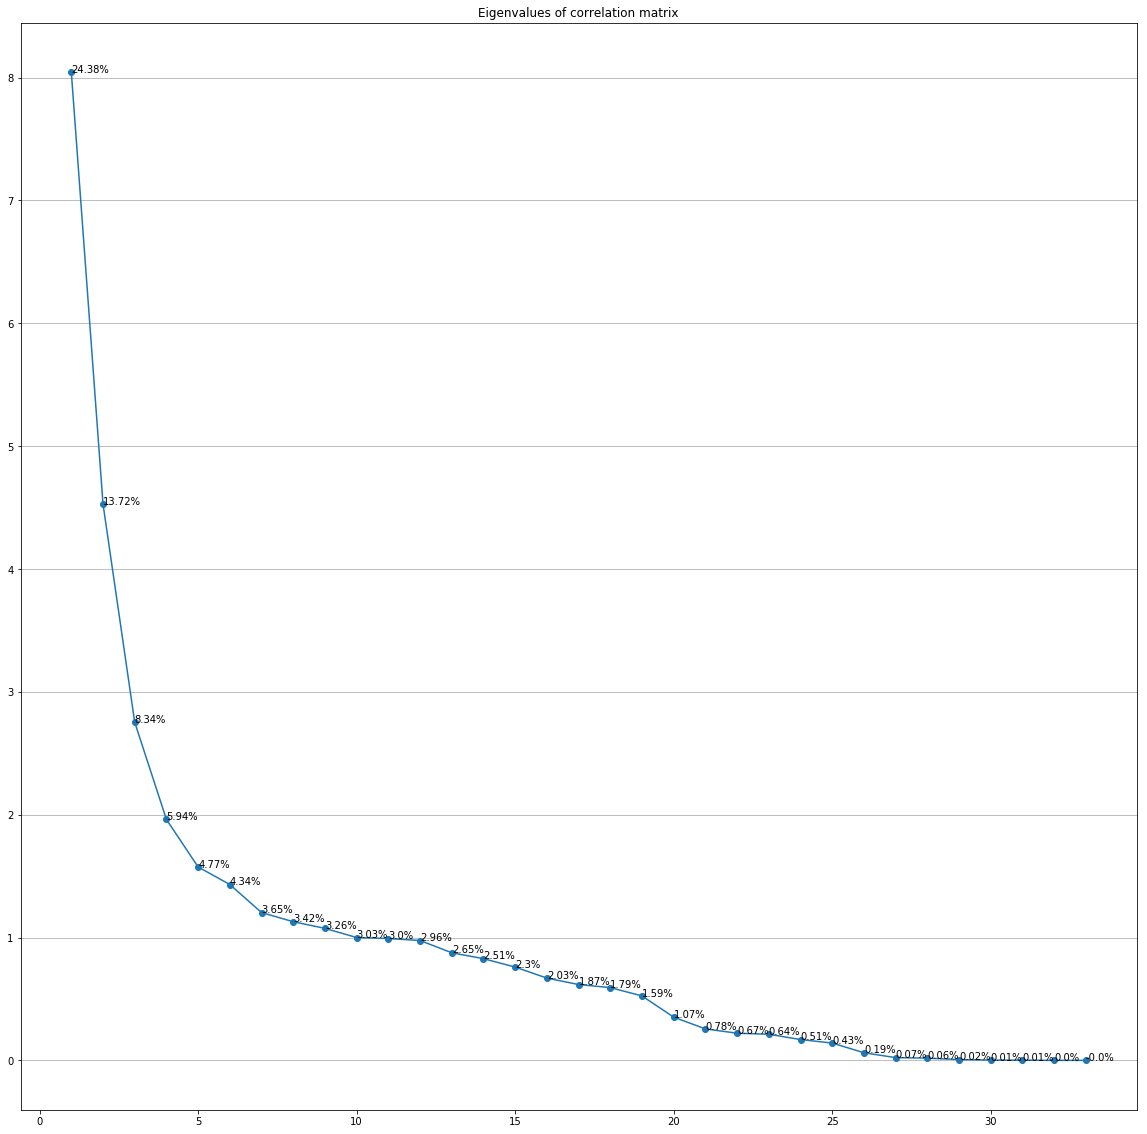

In [25]:
plt.figure(figsize=(20,20))
plt.plot(dft['x'], dft['y'], marker='o')
ax = plt.gca()
dft.apply(lambda x: ax.annotate(x['Tot_var'], (x['x'], x['y'])), axis=1);
plt.title('Eigenvalues of correlation matrix')
plt.grid(axis='y')
plt.show()

Выбираем количество главных компонент на основе критериев

In [26]:
pc = 9

In [27]:
#print(features)

## Матрица U

Матрица коэффициентов линейного преобразования имеет вид:

In [28]:
u=np.empty((f_len,f_len))
for i in range(f_len):
    u[i]=couple_lst[i][1] #достаем главные компоненты(собственные векторы корреляционной матрицы) из матрицы couple_list
    
#pd.DataFrame(u)

In [29]:
df_u=pd.DataFrame(
    data=u,
    index=['Factor_' + str(i + 1) for i in range(f_len)],
    columns=features)

#df_u.to_excel(writer,'U')
###writer.save()

df_u # eigenvectors of correlation matrix
# ВНИМАНИЕ !!!!!
#Она не сходится со статистикой !!! Но правильная именно в питоне ( в статистике матрица не нормирована, см. методичку) !!!

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
Factor_1,3.270201e-01,3.643419e-02,-3.453605e-02,-2.590013e-02,3.781324e-03,-3.644459e-03,-5.042644e-02,-2.072996e-02,-1.646404e-02,-6.258762e-02,...,-0.050904,-0.005179,0.015322,-0.004706,2.745823e-01,-5.338316e-02,3.275075e-01,-5.468618e-02,3.250261e-01,7.913975e-03
Factor_2,4.282480e-02,-4.437018e-02,1.821463e-01,3.052017e-01,-3.830583e-02,-3.009823e-02,4.311994e-01,1.395731e-01,1.999278e-01,1.630851e-01,...,0.412934,0.031884,0.091848,0.058002,1.413638e-02,1.610130e-01,4.880974e-02,1.133596e-01,3.508164e-02,-1.988533e-02
Factor_3,6.000068e-03,-2.545310e-01,3.452441e-01,-4.204032e-02,7.692019e-02,1.043812e-01,-6.628724e-02,1.643026e-01,1.260230e-01,4.038521e-01,...,-0.065725,-0.089645,-0.022403,0.029748,9.570606e-02,2.589457e-01,-9.814256e-04,3.992232e-01,9.250944e-03,4.226262e-02
Factor_4,1.889839e-01,5.456692e-02,-1.976406e-02,-2.504243e-02,-2.341381e-02,3.851458e-02,-3.938539e-02,-2.688661e-02,-4.604129e-02,1.496585e-01,...,-0.045476,-0.021979,0.040544,0.005439,-3.388736e-01,1.560636e-01,2.150828e-01,5.156626e-02,1.442757e-01,3.540833e-03
Factor_5,1.790526e-02,-5.294619e-01,1.481521e-01,1.509445e-01,-5.766918e-02,2.023503e-02,8.046697e-02,-2.914804e-01,-3.170736e-01,-2.670569e-01,...,0.139541,-0.079855,0.035983,0.007996,-2.064805e-02,-3.010878e-01,2.462301e-02,-1.303188e-01,1.376156e-02,-2.551765e-01
Factor_6,-2.559706e-02,-5.444677e-02,7.562945e-03,-1.865718e-01,2.239231e-02,3.708616e-01,-1.028134e-02,4.368587e-01,3.672450e-01,-1.806262e-01,...,-0.150318,0.189258,0.424604,0.225738,-1.789086e-02,-2.572650e-01,-1.659154e-02,-1.300467e-01,-3.411972e-02,-1.023460e-01
Factor_7,3.150536e-02,2.946460e-01,-4.128479e-01,3.370270e-02,-1.179987e-01,-1.844987e-01,5.566620e-02,2.005289e-01,8.167807e-02,-7.214135e-03,...,0.160409,0.230445,-0.304801,0.040538,3.918997e-02,-1.633476e-01,1.851559e-02,8.675534e-02,2.127274e-02,-2.921884e-01
Factor_8,-1.789349e-02,-1.171000e-01,1.513361e-01,-1.970844e-01,2.431002e-01,1.334743e-01,2.050450e-02,-1.436119e-01,-1.877705e-01,1.204735e-01,...,-0.071382,0.599848,0.025151,-0.233513,1.903736e-02,1.141722e-01,-1.452087e-02,-4.963691e-02,-2.171003e-02,-2.075814e-01
Factor_9,6.556219e-02,-2.140437e-01,2.491573e-01,1.912157e-02,4.690115e-01,-2.726314e-01,1.551588e-02,2.625827e-01,2.829311e-01,-2.402235e-01,...,0.041460,0.126902,-0.399031,-0.086039,-7.548841e-02,-1.796733e-01,5.933937e-02,-1.509506e-02,6.979997e-02,-6.275399e-02
Factor_10,1.596581e-02,-1.548719e-01,1.275898e-01,-9.004811e-02,-3.966993e-01,-3.363553e-01,1.502942e-02,4.264332e-02,-7.345512e-02,-3.353743e-03,...,-0.104615,0.504764,-0.165093,0.255616,-2.243790e-03,2.242149e-02,1.074460e-02,-7.549212e-02,1.360797e-02,4.909462e-01


Главные компоненты связаны с центрировано-нормированными исходными признаками следующими линейными комбинациями:

In [30]:
for i in range(0,pc):
    print(('Z{:1} = '+'{:2.3f}*X{:1} + '*4+'{:2.3f}*X{:1}').format(i+1,u[i][0],1,u[i][1],2,u[i][2],3,u[i][3],4,u[i][4],5))

Z1 = 0.327*X1 + 0.036*X2 + -0.035*X3 + -0.026*X4 + 0.004*X5
Z2 = 0.043*X1 + -0.044*X2 + 0.182*X3 + 0.305*X4 + -0.038*X5
Z3 = 0.006*X1 + -0.255*X2 + 0.345*X3 + -0.042*X4 + 0.077*X5
Z4 = 0.189*X1 + 0.055*X2 + -0.020*X3 + -0.025*X4 + -0.023*X5
Z5 = 0.018*X1 + -0.529*X2 + 0.148*X3 + 0.151*X4 + -0.058*X5
Z6 = -0.026*X1 + -0.054*X2 + 0.008*X3 + -0.187*X4 + 0.022*X5
Z7 = 0.032*X1 + 0.295*X2 + -0.413*X3 + 0.034*X4 + -0.118*X5
Z8 = -0.018*X1 + -0.117*X2 + 0.151*X3 + -0.197*X4 + 0.243*X5
Z9 = 0.066*X1 + -0.214*X2 + 0.249*X3 + 0.019*X4 + 0.469*X5


## Матрица нагрузок А

Рассчитаем матрицу нагрузок.

In [31]:
lmbd = np.zeros((f_len,f_len))
for i in range(f_len):
    lmbd[i][i]= math.sqrt(abs(eigenvalues[i]))
    
#print(f_len)

In [32]:
# матрица нагрузок
lmbd = np.zeros((f_len,f_len))
for i in range(f_len):
    lmbd[i][i]= math.sqrt(abs(eigenvalues[i]))
            
A = np.dot(u.T, lmbd)
df_A = pd.DataFrame(data=A,columns=['Factor_' + str(i + 1) for i in range(f_len)],index=features)

df_A.to_excel(writer,'df_A')
###writer.save()

df_A

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,...,Factor_24,Factor_25,Factor_26,Factor_27,Factor_28,Factor_29,Factor_30,Factor_31,Factor_32,Factor_33
X1,0.927534,0.091135,0.009954,0.264671,0.022466,-0.030625,0.034559,-0.019010,0.067964,0.015965,...,-0.026366,0.022770,0.007710,-0.015829,-0.009869,-0.033108,-0.031054,9.668769e-03,6.614444e-04,3.861019e-17
X2,0.103339,-0.094424,-0.422248,0.076421,-0.664334,-0.065141,0.323208,-0.124407,-0.221884,-0.154866,...,0.053144,0.081249,-0.040225,0.001356,-0.000738,-0.000790,0.000166,-2.499596e-05,-1.628333e-05,-1.019682e-18
X3,-0.097955,0.387625,0.572734,-0.027679,0.185892,0.009048,-0.452868,0.160779,0.258284,0.127585,...,0.053087,0.094695,-0.057820,-0.000496,-0.001340,-0.000729,-0.000180,4.104796e-05,-6.921188e-06,1.460331e-18
X4,-0.073461,0.649499,-0.069742,-0.035072,0.189395,-0.223219,0.036970,-0.209382,0.019822,-0.090045,...,0.001432,0.014352,0.001811,0.000324,0.001709,-0.000146,-0.000141,7.948152e-05,-8.689593e-06,1.318141e-18
X5,0.010725,-0.081519,0.127605,-0.032791,-0.072360,0.026791,-0.129437,0.258269,0.486191,-0.396684,...,-0.003435,-0.000933,0.002309,-0.000154,0.000196,-0.000001,-0.000015,2.336127e-05,8.688690e-07,7.373033e-18
X6,-0.010337,-0.064052,0.173161,0.053940,0.025390,0.443708,-0.202384,0.141803,-0.282618,-0.336342,...,0.008071,0.006706,-0.001503,0.000880,0.001292,-0.000008,-0.000102,7.118260e-05,9.190055e-07,-1.025690e-18
X7,-0.143026,0.917635,-0.109965,-0.055159,0.100965,-0.012301,0.061062,0.021784,0.016084,0.015029,...,0.031648,0.072558,0.195299,-0.003498,0.000086,0.001210,0.000350,-8.824038e-05,-3.601628e-06,7.716450e-18
X8,-0.058797,0.297025,0.272566,-0.037655,-0.365731,0.522668,0.219968,-0.152573,0.272201,0.042642,...,0.016854,0.015762,0.011255,0.000116,0.000318,0.000203,0.000012,6.748254e-05,8.049296e-07,2.383912e-19
X9,-0.046697,0.425466,0.209063,-0.064481,-0.397843,0.439381,0.089596,-0.199487,0.293295,-0.073452,...,-0.019746,-0.020418,-0.007252,0.000981,0.000226,0.000391,-0.000027,-7.768300e-05,6.512215e-06,-1.933961e-18
X10,-0.177519,0.347061,0.669960,0.209596,-0.335086,-0.216105,-0.007913,0.127991,-0.249023,-0.003354,...,-0.125570,-0.218394,0.037986,-0.002079,0.000533,0.000525,0.000323,-7.773264e-05,2.739923e-06,-1.115722e-17


In [33]:
# Могут не совпасть отдельные столбики со Statistica, так как собственные вектора берутся с точностью до знака
# Если очень хочется подогнать, можно написать:
#df_A['Factor_1'] *= -1  # если не совпал первый столбик
#df_A['Factor_2'] *= -1  # если не совпал второй столбик
#df_A['Factor_3'] *= -1  # если не совпал третий столбик
#df_A['Factor_4'] *= -1  #если не совпал четвертый столбик
#df_A['Factor_5'] *= -1  #если не совпал пятый столбик
#df_A#проверить, сходится ли теперь

In [34]:
df_A_cut = pd.DataFrame(data=A[:,:pc],columns=['Factor_' + str(i) for i in range(1,pc+1)],index=features)

df_A_cut.to_excel(writer,'df_A_cut')
###writer.save()

df_A_cut

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9
X1,0.927534,0.091135,0.009954,0.264671,0.022466,-0.030625,0.034559,-0.019010,0.067964
X2,0.103339,-0.094424,-0.422248,0.076421,-0.664334,-0.065141,0.323208,-0.124407,-0.221884
X3,-0.097955,0.387625,0.572734,-0.027679,0.185892,0.009048,-0.452868,0.160779,0.258284
X4,-0.073461,0.649499,-0.069742,-0.035072,0.189395,-0.223219,0.036970,-0.209382,0.019822
X5,0.010725,-0.081519,0.127605,-0.032791,-0.072360,0.026791,-0.129437,0.258269,0.486191
X6,-0.010337,-0.064052,0.173161,0.053940,0.025390,0.443708,-0.202384,0.141803,-0.282618
X7,-0.143026,0.917635,-0.109965,-0.055159,0.100965,-0.012301,0.061062,0.021784,0.016084
X8,-0.058797,0.297025,0.272566,-0.037655,-0.365731,0.522668,0.219968,-0.152573,0.272201
X9,-0.046697,0.425466,0.209063,-0.064481,-0.397843,0.439381,0.089596,-0.199487,0.293295
X10,-0.177519,0.347061,0.669960,0.209596,-0.335086,-0.216105,-0.007913,0.127991,-0.249023


Получим расположение признаков в пространстве первых двух главных компонент.
Если вы вдруг взяли 3 главные компоненты, то тут можно получать сравненение только по двум координатам,
меняя в 'Factor_' цифры
Трехмерное изображение не предусмотрено

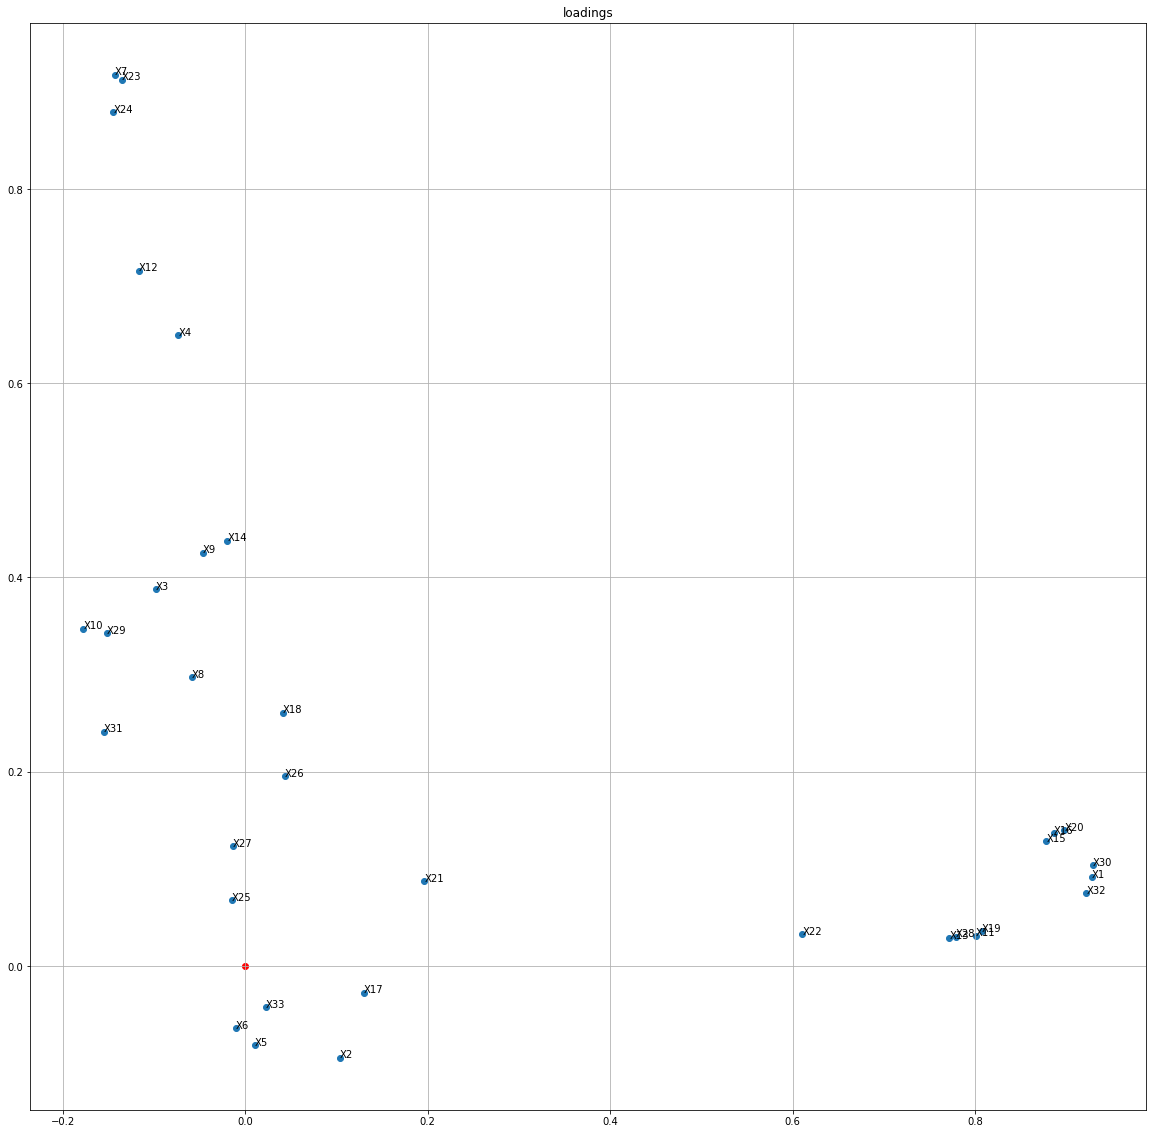

In [35]:
plt.figure(figsize=(20,20))
plt.scatter(df_A_cut['Factor_1'], df_A_cut['Factor_2'])
plt.scatter (0,0,c = 'r')
for i in features:
    plt.annotate('{}'.format(i), xy=(df_A_cut['Factor_1'][i], df_A_cut['Factor_2'][i]))
plt.title('loadings')
plt.grid()
plt.show()

Центрировано-нормированные исходные признаки связаны с центрировано-нормированными главными компонентами следующими выражениями:

In [36]:
for i in range(0,f_len):
    print(('X{:1} = '+'{:2.3f}*F{:1} + {:2.3f}*F{:1}').format(i+1,A[i][0],1,A[i][1],2))

X1 = 0.928*F1 + 0.091*F2
X2 = 0.103*F1 + -0.094*F2
X3 = -0.098*F1 + 0.388*F2
X4 = -0.073*F1 + 0.649*F2
X5 = 0.011*F1 + -0.082*F2
X6 = -0.010*F1 + -0.064*F2
X7 = -0.143*F1 + 0.918*F2
X8 = -0.059*F1 + 0.297*F2
X9 = -0.047*F1 + 0.425*F2
X10 = -0.178*F1 + 0.347*F2
X11 = 0.800*F1 + 0.031*F2
X12 = -0.117*F1 + 0.716*F2
X13 = 0.772*F1 + 0.028*F2
X14 = -0.020*F1 + 0.438*F2
X15 = 0.878*F1 + 0.129*F2
X16 = 0.886*F1 + 0.137*F2
X17 = 0.130*F1 + -0.028*F2
X18 = 0.041*F1 + 0.261*F2
X19 = 0.807*F1 + 0.036*F2
X20 = 0.898*F1 + 0.140*F2
X21 = 0.196*F1 + 0.087*F2
X22 = 0.611*F1 + 0.033*F2
X23 = -0.136*F1 + 0.912*F2
X24 = -0.144*F1 + 0.879*F2
X25 = -0.015*F1 + 0.068*F2
X26 = 0.043*F1 + 0.195*F2
X27 = -0.013*F1 + 0.123*F2
X28 = 0.779*F1 + 0.030*F2
X29 = -0.151*F1 + 0.343*F2
X30 = 0.929*F1 + 0.104*F2
X31 = -0.155*F1 + 0.241*F2
X32 = 0.922*F1 + 0.075*F2
X33 = 0.022*F1 + -0.042*F2


## Расчет индивидуальных значений (матрица F)

Рассчитаем матрицу индивидуальных значений центрировано-нормированных главных компонент.

In [37]:
F=np.dot(np.dot(np.linalg.inv(np.dot(A[:,:pc].T,A[:,:pc])),A[:,:pc].T),data.T)
df_F = pd.DataFrame(data=F.T, columns=['Factor'+str(i) for i in range(1,pc+1)], index=data.index).head()

df_F.to_excel(writer,'F')
###writer.save()

df_F

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9
КО,,,,,,,,,
КО1,0.336162,-0.780375,-0.491796,-0.181429,-0.760470,-0.569364,-0.838062,-0.941803,0.333627
КО2,-0.143780,0.292755,-0.158698,-0.149428,0.821914,-0.389633,-0.284297,0.102507,0.137073
КО3,-0.017595,-0.657856,-0.067893,-0.108871,-0.050228,-0.112208,-0.247965,0.347210,0.642409
КО4,-0.025566,1.563998,-2.498848,-0.608174,0.809212,-0.332137,-1.361306,0.856764,0.213236
КО5,-0.080355,-0.024067,0.072773,-0.022862,0.302663,-0.508037,-0.795178,-0.722677,0.160073


# Снижение размерности признакового пространства методом главных факторов

## Оценки общностей и ОЦЕНКА редуцированной матрицы

### Оценки общностей

Оценками общностей будут служить квадраты оценок множественных коэффициентов корреляции.

In [38]:
communalities=[]
for variable in features:
    communalities.append(ols(formula="{} ~ {}".format(variable, ' + '.join(set(features)-set([variable]))),data=data).fit().rsquared)

In [39]:
comm = pd.DataFrame(communalities,index = features,columns = ['Communalities']) # это те самые множественные коэффициенты корреляции, которые являются оценками общностей

comm.to_excel(writer,'Общности')
###writer.save()

comm

,Communalities
X1,0.996160
X2,0.621571
X3,0.699050
X4,0.439803
X5,0.034672
X6,0.093866
X7,0.906260
X8,0.355498
X9,0.399403
X10,0.759786


### Оценка матрицы Rh

На основе оценки матрицы парных коэффициентов корреляции и оценок общностей можно составить ОЦЕНКУ редуцированной матрицы R<sub><small>h</small></sub>.

In [40]:
Rh_eval = np.empty((f_len,f_len)) # оценка матрицы Rh - она как R, но на диагоналях оценки общностей
for i in range (f_len):
    for j in range (f_len):
        if i==j:
            Rh_eval[i][j] = communalities[i]
        else:
            Rh_eval[i][j] = correlations.values [i][j]
            
Rh = pd.DataFrame(Rh_eval, index=features, columns=features)
Rh.to_excel(writer,'Оценка редуц матрицы')
###writer.save()
Rh

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
X1,0.996160,0.087933,-0.051126,-0.006730,-0.000610,-0.011558,-0.060567,-0.032866,-0.018122,-0.091087,...,-0.050367,-0.008619,0.003642,-0.006165,0.591244,-0.076591,0.986753,-0.082493,0.987832,0.014789
X2,0.087933,0.621571,-0.596800,-0.077465,-0.023053,-0.074467,-0.082833,0.023955,0.039289,-0.043533,...,-0.110560,0.062803,-0.033521,-0.031932,0.023816,-0.019087,0.083192,-0.072173,0.084645,0.047514
X3,-0.051126,-0.596800,0.699050,0.199135,0.062759,0.090002,0.301965,0.195156,0.204881,0.425572,...,0.201969,-0.012756,0.045696,0.036996,-0.002800,0.308188,-0.047430,0.404515,-0.045252,0.013119
X4,-0.006730,-0.077465,0.199135,0.439803,-0.086178,-0.091163,0.572547,0.106898,0.100722,0.135650,...,0.616772,-0.076126,0.051446,0.049275,-0.035402,0.154177,0.004287,0.111353,-0.012464,-0.043520
X5,-0.000610,-0.023053,0.062759,-0.086178,0.034672,0.001760,-0.072610,-0.007059,0.034217,0.015019,...,-0.077868,0.010034,-0.012045,-0.020481,0.019630,0.013147,-0.001708,0.072772,0.003151,-0.026716
X6,-0.011558,-0.074467,0.090002,-0.091163,0.001760,0.093866,-0.070299,0.093810,0.046675,0.080721,...,-0.101680,-0.025030,0.141406,0.004449,-0.007488,-0.043833,-0.004995,0.012355,-0.014797,-0.008006
X7,-0.060567,-0.082833,0.301965,0.572547,-0.072610,-0.070299,0.906260,0.171215,0.334329,0.198332,...,0.888100,0.130076,0.175167,0.126809,-0.078100,0.223073,-0.050585,0.170370,-0.072939,-0.049655
X8,-0.032866,0.023955,0.195156,0.106898,-0.007059,0.093810,0.171215,0.355498,0.527947,0.226755,...,0.144491,0.088670,0.071796,0.111151,0.007023,0.095281,-0.033485,0.174553,-0.039365,0.018027
X9,-0.018122,0.039289,0.204881,0.100722,0.034217,0.046675,0.334329,0.527947,0.399403,0.191479,...,0.271325,0.006139,0.118685,0.076172,0.015110,0.188948,-0.020027,0.201686,-0.024054,0.021530
X10,-0.091087,-0.043533,0.425572,0.135650,0.015019,0.080721,0.198332,0.226755,0.191479,0.759786,...,0.192823,-0.048424,0.005922,0.031218,-0.079358,0.699049,-0.089978,0.591493,-0.104615,0.108209


## Выбор количества факторов

Рассчитаем оценку собственных чисел оцененной матрицы R<sub><small>h</small></sub>.

In [41]:
uns_eigenvalues_Rh_eval,eigenvectors_Rh_eval=np.linalg.eig(Rh_eval)
couple_lst=[]
for i in range(len(uns_eigenvalues_Rh_eval)): # список по убыванию сз с соответствующими св
    couple_lst.append((uns_eigenvalues_Rh_eval[i],eigenvectors_Rh_eval[:,i]))
    
from operator import itemgetter
couple_lst = sorted(couple_lst, key = itemgetter(0),reverse=True)
#значениями оценок собственных чисел (eigenvalues), расположенных по убыванию
eigenvalues_Rh_eval=sorted(uns_eigenvalues_Rh_eval,reverse=True)


Выведем собственные значения и соответсвующие им собственые вектора оцененной матрицы R<sub><small>h</small></sub>.

In [42]:
couple_lst

[(8.005390638097957,
  array([-0.32857332, -0.03389469,  0.03193777,  0.02352998, -0.0033895 ,
          0.00308486,  0.0489269 ,  0.01839777,  0.01449592,  0.05939099,
         -0.28397139,  0.03925919, -0.27377922,  0.00697337, -0.3108386 ,
         -0.3137502 , -0.04129122, -0.01317194, -0.28633155, -0.31814928,
         -0.06226892, -0.20417447,  0.04684453,  0.05003368,  0.00525513,
         -0.01575372,  0.00446257, -0.27445269,  0.04993098, -0.32878897,
          0.05043301, -0.32623491, -0.00693966])),
 (4.333480368366676,
  array([ 0.04165295, -0.04382122,  0.17439716,  0.28112643, -0.0321719 ,
         -0.02578623,  0.44370763,  0.12159495,  0.17828928,  0.15808113,
          0.01099533,  0.32764957,  0.00977899,  0.19627047,  0.06058241,
          0.06462082, -0.01239986,  0.10735041,  0.01352747,  0.06591207,
          0.03485421,  0.01263241,  0.45197326,  0.435153  ,  0.03482267,
          0.09639016,  0.06096058,  0.01055677,  0.15079426,  0.04791167,
          0.1039284

### Сравнение общности с суммой лямбд

In [43]:
print('Суммарная общность: ', np.trace(Rh_eval))
print('Сумма оценок первых двух собственных чисел редуцированной матрицы:', eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1])
if  np.trace(Rh_eval) < eigenvalues_Rh_eval[0]+eigenvalues_Rh_eval[1]:
    print('Размерность признакового пространства можно снизить до двух общих факторов.')
else:
    print ('До двух факторов снизить нельзя')

Суммарная общность:  23.101750696613745
Сумма оценок первых двух собственных чисел редуцированной матрицы: 12.338871006464633
До двух факторов снизить нельзя


### Критерий каменистой осыпи

In [44]:
dft = pd.DataFrame([])
eigenvalues_pos=[]
for i in range (len(eigenvalues_Rh_eval)):
    if eigenvalues_Rh_eval[i] >= 0:
        eigenvalues_pos.append(eigenvalues_Rh_eval[i])
dft['y'] = eigenvalues_pos
dft['x'] = list (range(len(eigenvalues_pos)))
dft['Tot_var'] = (dft['y']/f_len).apply(lambda x: round(x * 100, 2)).apply(str) + '%'

dft.to_excel(writer,'Осыпь')
###writer.save()

dft

,y,x,Tot_var
0,8.005391,0,24.26%
1,4.333480,1,13.13%
2,2.370391,2,7.18%
3,1.903306,3,5.77%
4,1.184499,4,3.59%
5,1.151884,5,3.49%
6,1.024140,6,3.1%
7,0.965544,7,2.93%
8,0.719021,8,2.18%
9,0.642897,9,1.95%


Построим график собственных чисел (положительных).

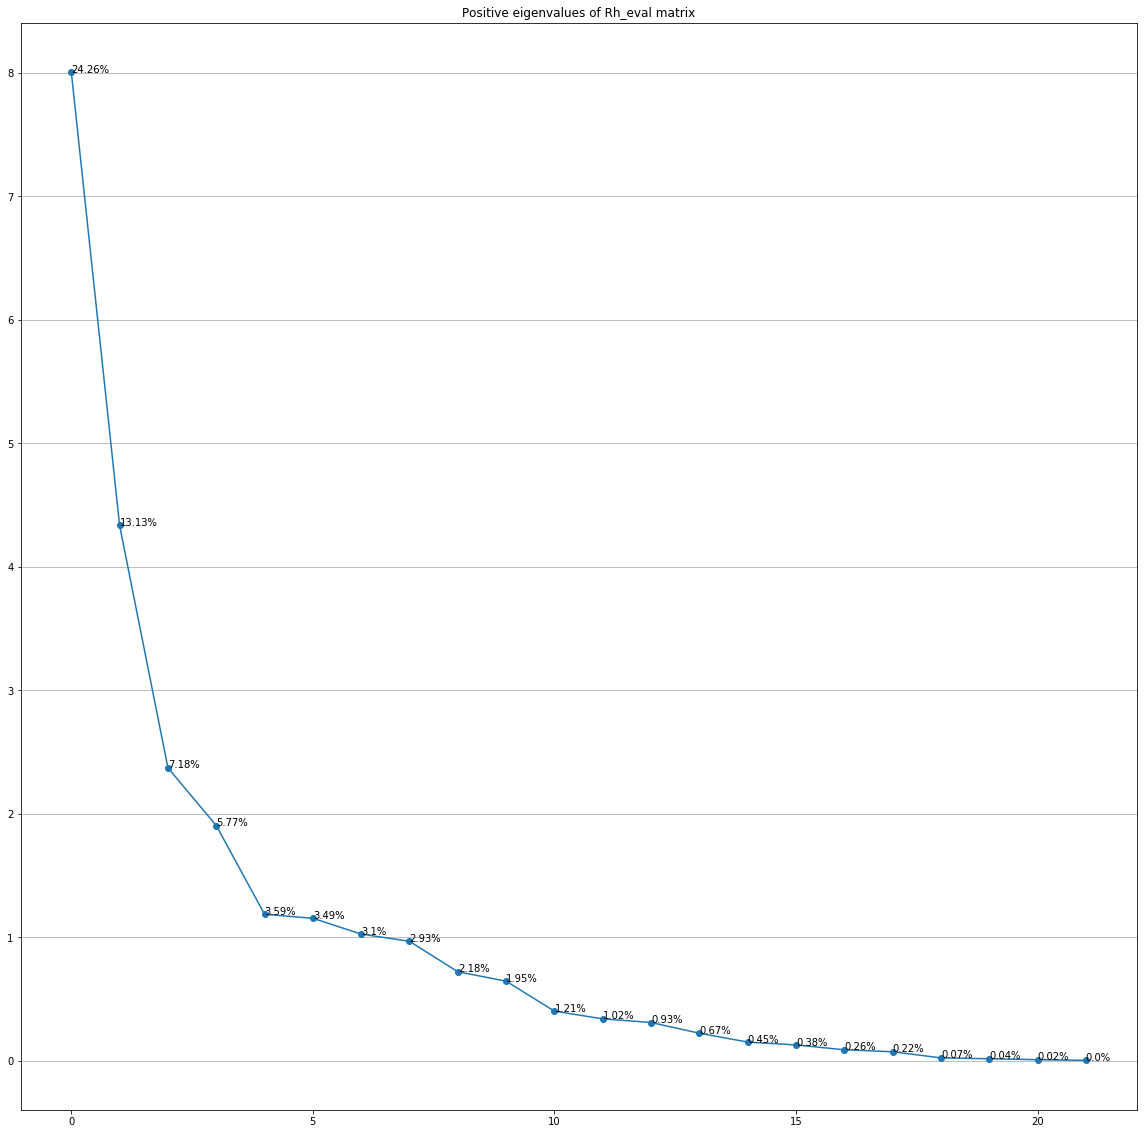

In [45]:
plt.figure(figsize=(20,20))
plt.plot(dft['x'], dft['y'], marker='o')
ax = plt.gca()
dft.apply(lambda x: ax.annotate(x['Tot_var'], (x['x'], x['y'])), axis=1)
plt.title('Positive eigenvalues of Rh_eval matrix')
plt.grid(axis='y')
plt.show()

### Критерий Кайзера

Посмотрим, сколько факторов предлагает брать критерий Кайзера.

In [46]:
print('Критерий Кайзера предлагает {} фактор(-а/ов).'
      .format(len(uns_eigenvalues_Rh_eval[uns_eigenvalues_Rh_eval > 1])))

Критерий Кайзера предлагает 7 фактор(-а/ов).


### Итоговое решение (на самом деле придется всегда брать 2)

Установим число факторов равное двум.

In [47]:
fact = 7

## матрица U

Рассчитаем матрицу U.

In [48]:
U = np.empty ((fact,f_len)) # матрица U (у неё по строкам собств. вектора, соотв. положительным значениям РЕДУЦИРОВАННОЙ МАТРИЦЫ (уточнить у Домашовой))
for i in range(fact):
    U[i]=couple_lst[i][1]
    
df_U=pd.DataFrame( # обертка в датафрейм
    data=U,
    index=['Factor_' + str(i + 1) for i in range(fact)],
    columns=features)

df_U.to_excel(writer,'U')
###writer.save()

df_U

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
Factor_1,-0.328573,-0.033895,0.031938,0.023530,-0.003390,0.003085,0.048927,0.018398,0.014496,0.059391,...,0.050034,0.005255,-0.015754,0.004463,-0.274453,0.049931,-0.328789,0.050433,-0.326235,-0.006940
Factor_2,0.041653,-0.043821,0.174397,0.281126,-0.032172,-0.025786,0.443708,0.121595,0.178289,0.158081,...,0.435153,0.034823,0.096390,0.060961,0.010557,0.150794,0.047912,0.103928,0.033383,-0.017943
Factor_3,0.023208,0.254720,-0.364599,0.026327,-0.058195,-0.074668,0.060299,-0.142756,-0.115649,-0.423315,...,0.060622,0.114913,0.035932,-0.035126,-0.134755,-0.261659,0.033737,-0.383656,0.014200,-0.036725
Factor_4,0.193191,-0.009907,0.055787,-0.024872,-0.000571,0.035955,-0.052048,0.007445,-0.010230,0.188663,...,-0.064410,-0.049598,0.042311,0.014729,-0.322633,0.162980,0.217694,0.098342,0.148255,0.008682
Factor_5,-0.067895,-0.189321,0.101128,-0.097045,0.007967,0.158012,0.009047,0.140072,0.112587,-0.150597,...,-0.204323,0.142954,0.710211,0.441077,-0.002318,-0.161616,-0.052057,-0.086122,-0.070669,-0.041975
Factor_6,-0.019432,0.516477,-0.159416,-0.160257,0.027185,0.011873,-0.056898,0.245245,0.240767,0.317984,...,-0.216551,0.417945,0.069877,0.050554,0.027014,0.292054,-0.024378,0.113639,-0.020647,0.110100
Factor_7,-0.030084,0.277138,-0.170019,0.068620,-0.028076,-0.006240,-0.055847,-0.005439,0.077516,0.089989,...,0.012318,-0.826961,0.206243,0.239093,0.011262,0.148968,-0.026852,0.026793,-0.023590,0.071537


### Матрица нагрузок A

Рассчитаем матрицу нагрузок.

In [49]:
sqrt_l=np.eye(fact)
for i in range(fact):
    sqrt_l[i][i]=math.sqrt(eigenvalues_Rh_eval[i])  
A=np.dot(U.T,sqrt_l)
df_A = pd.DataFrame(
    data=A,
    columns=['Factor_' + str(i + 1) for i in range(fact)],
    index=features)

df_A.to_excel(writer,'нагрузки A')
###writer.save()

df_A # на этом этапе матрица может не совпасть со statistica во всех знаках 1-ого или 2-ого столбца (или в обоих)
# Это НЕ ОШИБКА, так как собственные вектора матрицы U (а по ней по сути и строится А) берутся с точностью до знака

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7
X1,-0.929659,0.086709,0.035732,0.266528,-0.073893,-0.020855,-0.030445
X2,-0.095901,-0.091223,0.392169,-0.013668,-0.206047,0.554313,0.280463
X3,0.090364,0.363043,-0.561340,0.076964,0.110062,-0.171094,-0.172058
X4,0.066575,0.585221,0.040533,-0.034314,-0.105619,-0.171998,0.069444
X5,-0.009590,-0.066972,-0.089597,-0.000787,0.008670,0.029177,-0.028412
X6,0.008728,-0.053679,-0.114960,0.049603,0.171972,0.012743,-0.006315
X7,0.138433,0.923667,0.092837,-0.071806,0.009847,-0.061066,-0.056517
X8,0.052054,0.253124,-0.219788,0.010271,0.152447,0.263211,-0.005505
X9,0.041014,0.371145,-0.178053,-0.014113,0.122533,0.258406,0.078446
X10,0.168040,0.329078,-0.651739,0.260281,-0.163902,0.341279,0.091069


In [50]:
df_A.shape

(33, 7)

Если очень хочется подогнать под statistica, то можно написать:

In [51]:
#df_A['Factor_1'] *= -1  # если не совпал первый столбец

In [52]:
#df_A['Factor_2'] *= -1 #   если не совпал второй столбец

In [53]:
#df_A # проверить, совпадает ли теперь

Построим расположение исходных признаков на плоскости, образованной двумя главными факторами.

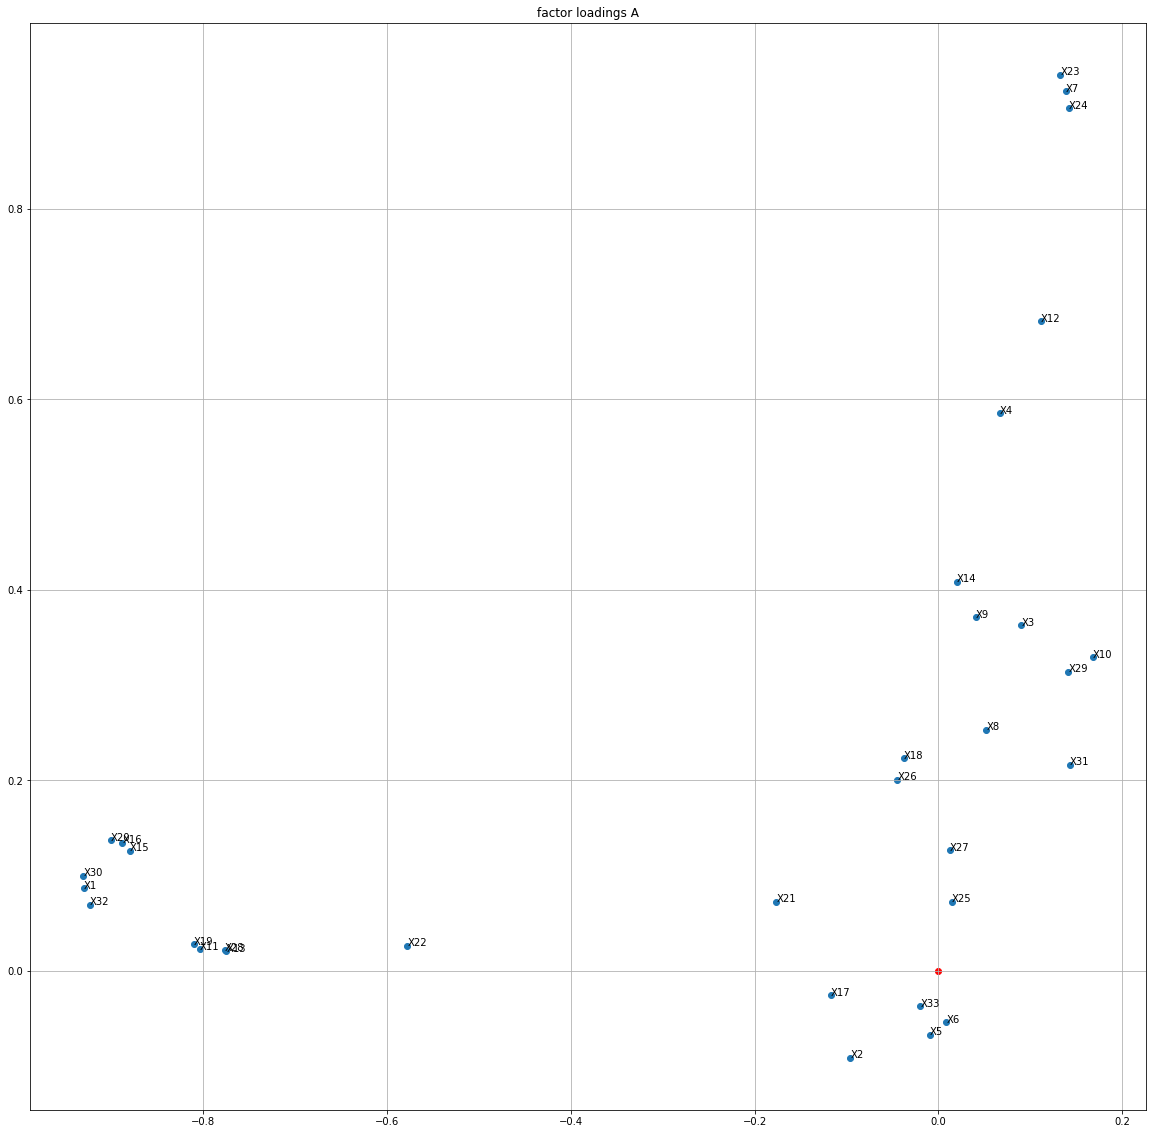

In [54]:
plt.figure(figsize=(20,20))
plt.scatter(df_A['Factor_1'],df_A['Factor_2'])
plt.scatter (0,0,c = 'r') # чтобы было видно, относительно чего потом будем поворачивать
plt.grid()
plt.title ('factor loadings A')
for variable in features :
    plt.annotate('{}'.format(variable),xy = (df_A['Factor_1'][variable],df_A['Factor_2'][variable]))

## Вращение факторов

In [55]:
_ = \
'''
задумка, чтобы максимально подогнать под статистику

Будем осуществлять повороты на углы от 0 до pi/2 с очень маленьким шагом и считать квартимакс(варимакс) 
для каждого угла
По максимальному квартимаксу(варимаксу) отбираем соответствующую матрицу B
'''

In [56]:
def quartimax (X): # ФУНКЦИИ ДЛЯ ВЫБОРА И  РАСЧЕТА КРИТЕРИЯ
    value = 0
    m = X.shape[1]
    for row in X:
        value += (sum (row**4) - (sum(row**2))**2)/m**2
    return value

def varimax (X) :
    value = 0
    k = X.shape[0]
    for row in X.T:
        value += (k*sum(row**4) - sum(row**2)**2)/k**2
    return value
    
def criteria (method,X):
    if method == 'varimax':
        return varimax(X)
    elif method == 'quartimax':
        return quartimax (X)
    else :
        print ('wrong input')

In [57]:
print(A)

[[-9.29658754e-01  8.67089927e-02  3.57318502e-02  2.66527568e-01
  -7.38932566e-02 -2.08554888e-02 -3.04449263e-02]
 [-9.59009568e-02 -9.12226915e-02  3.92169338e-01 -1.36679511e-02
  -2.06046672e-01  5.54312915e-01  2.80463079e-01]
 [ 9.03640934e-02  3.63042805e-01 -5.61339583e-01  7.69642225e-02
   1.10062497e-01 -1.71094216e-01 -1.72058492e-01]
 [ 6.65752634e-02  5.85221265e-01  4.05330994e-02 -3.43136996e-02
  -1.05618703e-01 -1.71997651e-01  6.94435673e-02]
 [-9.59019598e-03 -6.69722908e-02 -8.95971873e-02 -7.87116599e-04
   8.67046576e-03  2.91767644e-02 -2.84124127e-02]
 [ 8.72823569e-03 -5.36792259e-02 -1.14959868e-01  4.96031460e-02
   1.71971716e-01  1.27425028e-02 -6.31492113e-03]
 [ 1.38432796e-01  9.23666766e-01  9.28372154e-02 -7.18057587e-02
   9.84651375e-03 -6.10664749e-02 -5.65166276e-02]
 [ 5.20542721e-02  2.53124358e-01 -2.19788443e-01  1.02711941e-02
   1.52447008e-01  2.63211493e-01 -5.50451627e-03]
 [ 4.10144656e-02  3.71145033e-01 -1.78053482e-01 -1.41132360e-0

In [58]:
#B = np.dot (A,T)
#print(B)

In [59]:
rad_column = [] # это список, в который будут складываться углы в радианах
grad_column=[] # это список, в который будут складывать углы в градусах

criteria_column = [] # это список, в который будут складываться квартимаксы
dict_for_B = {} # это словарь, где ключами будут квартимаксы, а значениями - матрицы

for alpha in arange (0,pi/2,0.0001): # Проходим от 0 до pi/2 с шагом 0.0001
    
    rad_column.append(alpha)
    grad_column.append(alpha*180/pi)
    
    grad = alpha
    T = [[cos(grad),sin(grad)],
         [-sin(grad),cos(grad)]]
    B = np.dot (A,T)
    dict_for_B[criteria('quartimax',B)] = B # здесь пишем метод, который мы хотим
    criteria_column.append (criteria('quartimax',B)) # и здесь тоже

ValueError: shapes (33,7) and (2,2) not aligned: 7 (dim 1) != 2 (dim 0)

In [ ]:
df_rotation = pd.DataFrame([]) # дата фрейм, в который мы положим заполненные списки
df_rotation['rad'] = rad_column
df_rotation['grad'] = grad_column
df_rotation ['criteria'] = criteria_column
#df_rotation # это по сути и есть та самая сетка

### Максимальное значение критерия

In [ ]:
criteria_best = df_rotation ['criteria'].max() # ищем максимальное значение критерия
criteria_best

### Лучший угол для вращения

In [ ]:
rad_best = df_rotation.loc[df_rotation['criteria'].idxmax(),'rad']# вывод лучшего угла
grad_best = df_rotation.loc [df_rotation['criteria'].idxmax(),'grad']
print ('Лучший угол для вращения :{:.3f} радиан или {:.3f} градусов'.format (rad_best,grad_best)) 

### Матрица B 

Весовые коэффициенты факторов после вращения:

In [ ]:
B = dict_for_B [criteria_best] # вывод лучшей матрицы
df_B = pd.DataFrame(data=B, columns=['Factor_' + str(i + 1) for i in range(fact)], index=features)

#df_B.to_excel(writer,'нагрузки B')
###writer.save()

df_B

In [ ]:
_ = \
'''
Результат может не сходиться со statistica (могут не совпадать все знаки в столбце(-цах), 
а также в statistica может быть другой порядок столбцов (или всё вместе))
Это НЕ ОШИБКА, так как данное несоответствие обуславливается тем, что: 
 a) Могло быть несоответствие в матрице A и его не поправляли
 б) Угол поворота в statistica был не в интервале [0;pi/2]
Если очень хочется подогнать под статистику,то:
1)подгоните матрицу A (если надо) 
2)попробуйте поменять промежуток в цикле на :

2a)[pi/2 ; pi]  в случае, если столбцы  поменялись местами и не совпадает знак ПЕРВОГО столбца в полученной матрице
2б) [pi;3*pi/2] в случае если столбцы на месте, но отличаются АБСОЛЮТНО ВСЕ ЗНАКИ
2в) [3*pi/2;2*pi] в случае если столбцы поменялись местами и не совпадает знак ВТОРОГО столбца в полученной матрице

Если у вас матрица B не сходится со статистикой и при этом не подходит ни одному из случаев, то вы либо
не подогнали A, либо накосячили ещё где-то )))

'''

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(df_B['Factor_1'],df_B['Factor_2'])
plt.scatter (0,0,c= 'r')
plt.grid()
plt.title ('factor loadings B')
for variable in features :
    plt.annotate('{}'.format(variable),xy = (df_B['Factor_1'][variable],df_B['Factor_2'][variable]))
    #график может не совпасть со statistica по описанным ранее причинам

### Теперь сравниваем два графика (две матрицы) A и B и решаем, помогло ли вращение.Если НЕ помогло, то следует снять комментарий и прораннить следующую строчку:

In [60]:
B = A

## Rh, D2, значения характерностей

Рассчитаем характерности. Для этого нам необходимо получить матрицы R<sub><small>h</small></sub> (оценка редуцированной матрицы) и D<sup>2</sup> (оценка остаточной матрицы парных коэффициентов корреляции).

In [61]:
Rh_real = np.dot(B,B.T)
Rh_new = pd.DataFrame(Rh_real,index = features,columns = features) # в statistica это reproduced corr

Rh_new.to_excel(writer,'оценка ред матрицы')
###writer.save()

Rh_new

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
X1,0.950920,0.086742,-0.051400,-0.009568,-0.000687,-0.016437,-0.062159,-0.048147,-0.032903,-0.079380,...,-0.052510,-0.014826,0.011336,-0.041221,0.597003,-0.056714,0.960943,-0.095286,0.926307,0.014894
X2,0.086742,0.599880,-0.428750,-0.097507,-0.021680,-0.071844,-0.111875,-0.001471,0.032567,-0.056796,...,-0.137909,0.044152,-0.052288,-0.035249,0.016974,0.049030,0.085930,-0.172397,0.084828,0.078171
X3,-0.051400,-0.428750,0.531982,0.198937,0.025904,0.067484,0.311456,0.193457,0.193087,0.428434,...,0.295572,0.007452,0.078588,0.081054,0.012812,0.271243,-0.050980,0.397603,-0.055278,-0.020375
X4,-0.009568,-0.097507,0.198937,0.395297,-0.051344,-0.057989,0.561531,0.080583,0.161260,0.133358,...,0.610712,-0.098769,0.034656,0.028986,-0.035902,0.144201,-0.003167,0.098319,-0.016638,-0.036341
X5,-0.000687,-0.021680,0.025904,-0.051344,0.014339,0.015815,-0.071540,0.011391,-0.002913,0.040487,...,-0.079381,0.017419,-0.015054,-0.004920,0.025415,0.016876,-0.003131,0.038934,0.001443,0.008741
X6,-0.016437,-0.071844,0.067484,-0.057989,0.015815,0.048410,-0.061336,0.042248,0.024074,0.047224,...,-0.103810,0.010262,0.117940,0.082241,-0.006322,0.014641,-0.014452,0.049530,-0.017513,0.002120
X7,-0.062159,-0.111875,0.311456,0.561531,-0.071540,-0.061336,0.893119,0.205605,0.313969,0.220424,...,0.882653,0.111791,0.171348,0.100222,-0.076938,0.226566,-0.050823,0.145105,-0.074303,-0.055086
X8,-0.048147,-0.001471,0.193457,0.080583,0.011391,0.042248,0.205605,0.207745,0.221333,0.302304,...,0.120094,0.125927,0.173337,0.131005,0.013353,0.232523,-0.046884,0.211073,-0.050588,0.025813
X9,-0.032903,0.032567,0.193087,0.161260,-0.002913,0.024074,0.313969,0.221333,0.259275,0.316648,...,0.240319,0.066304,0.192435,0.148782,0.027607,0.262126,-0.030459,0.211565,-0.035868,0.025846
X10,-0.079380,-0.056796,0.428434,0.133358,0.040487,0.047224,0.220424,0.302304,0.316648,0.780668,...,0.196193,-0.055392,-0.044407,0.046290,-0.092546,0.597650,-0.081300,0.574911,-0.090382,0.078786


In [62]:
D2 = correlations.values - Rh_real
D2_new = pd.DataFrame(D2,index = features,columns = features) # в statistica это residual corr

D2_new.to_excel(writer,'оценка ост матрицы')
###writer.save()

D2_new

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33
X1,0.049080,0.001191,0.000273,0.002838,0.000077,0.004879,0.001592,0.015281,0.014782,-0.011707,...,0.002142,0.006207,-0.007694,0.035057,-0.005759,-0.019877,0.025810,0.012793,0.061525,-0.000105
X2,0.001191,0.400120,-0.168051,0.020042,-0.001374,-0.002624,0.029042,0.025426,0.006722,0.013263,...,0.027349,0.018652,0.018767,0.003317,0.006843,-0.068117,-0.002737,0.100224,-0.000183,-0.030656
X3,0.000273,-0.168051,0.468018,0.000197,0.036855,0.022518,-0.009492,0.001699,0.011794,-0.002862,...,-0.093602,-0.020208,-0.032891,-0.044058,-0.015612,0.036946,0.003550,0.006912,0.010025,0.033494
X4,0.002838,0.020042,0.000197,0.604703,-0.034834,-0.033175,0.011016,0.026315,-0.060538,0.002291,...,0.006060,0.022643,0.016790,0.020290,0.000500,0.009976,0.007454,0.013035,0.004174,-0.007179
X5,0.000077,-0.001374,0.036855,-0.034834,0.985661,-0.014054,-0.001071,-0.018450,0.037129,-0.025468,...,0.001513,-0.007385,0.003009,-0.015561,-0.005784,-0.003730,0.001423,0.033838,0.001708,-0.035458
X6,0.004879,-0.002624,0.022518,-0.033175,-0.014054,0.951590,-0.008963,0.051561,0.022601,0.033497,...,0.002130,-0.035292,0.023466,-0.077792,-0.001166,-0.058474,0.009458,-0.037175,0.002716,-0.010126
X7,0.001592,0.029042,-0.009492,0.011016,-0.001071,-0.008963,0.106881,-0.034391,0.020361,-0.022092,...,0.005447,0.018285,0.003819,0.026587,-0.001162,-0.003493,0.000238,0.025265,0.001364,0.005431
X8,0.015281,0.025426,0.001699,0.026315,-0.018450,0.051561,-0.034391,0.792255,0.306614,-0.075549,...,0.024397,-0.037257,-0.101541,-0.019854,-0.006329,-0.137242,0.013399,-0.036520,0.011224,-0.007786
X9,0.014782,0.006722,0.011794,-0.060538,0.037129,0.022601,0.020361,0.306614,0.740725,-0.125169,...,0.031006,-0.060166,-0.073750,-0.072610,-0.012497,-0.073178,0.010432,-0.009879,0.011815,-0.004316
X10,-0.011707,0.013263,-0.002862,0.002291,-0.025468,0.033497,-0.022092,-0.075549,-0.125169,0.219332,...,-0.003370,0.006967,0.050330,-0.015072,0.013188,0.101399,-0.008678,0.016581,-0.014233,0.029424


In [63]:
charact =[]
for i in range(D2.shape[0]):
    charact.append (math.sqrt(D2[i][i]))
charact

[0.22154093044874318,
 0.6325505882849567,
 0.68411806371724,
 0.7776262157005182,
 0.9928044818204681,
 0.9754945384872705,
 0.3269266803039659,
 0.8900872290080817,
 0.8606540728545086,
 0.4683285926117837,
 0.08394150598242071,
 0.6454773606496996,
 0.13758302936667124,
 0.7129877064710267,
 0.2899270449860362,
 0.243129564384665,
 0.9135159642026429,
 0.9324390082635567,
 0.12066230362718325,
 0.22083806404164788,
 0.9168724802613071,
 0.7637543548482154,
 0.2265340449486348,
 0.19786282060159824,
 0.18097534635149,
 0.5519368320572496,
 0.8297386175685036,
 0.39290904540138927,
 0.7188466323669424,
 0.1646880453626012,
 0.7356130802533378,
 0.3063900685513057,
 0.9867053403930289]

In [64]:
for i in range(0,f_len):
    print('X{} = {:.3f}*F{} + {:.3f}*F{} + {:.3f}*D{}'.format(i+1,B[i,0],1,B[i,1],2,charact[i],i+1))

X1 = -0.930*F1 + 0.087*F2 + 0.222*D1
X2 = -0.096*F1 + -0.091*F2 + 0.633*D2
X3 = 0.090*F1 + 0.363*F2 + 0.684*D3
X4 = 0.067*F1 + 0.585*F2 + 0.778*D4
X5 = -0.010*F1 + -0.067*F2 + 0.993*D5
X6 = 0.009*F1 + -0.054*F2 + 0.975*D6
X7 = 0.138*F1 + 0.924*F2 + 0.327*D7
X8 = 0.052*F1 + 0.253*F2 + 0.890*D8
X9 = 0.041*F1 + 0.371*F2 + 0.861*D9
X10 = 0.168*F1 + 0.329*F2 + 0.468*D10
X11 = -0.803*F1 + 0.023*F2 + 0.084*D11
X12 = 0.111*F1 + 0.682*F2 + 0.645*D12
X13 = -0.775*F1 + 0.020*F2 + 0.138*D13
X14 = 0.020*F1 + 0.409*F2 + 0.713*D14
X15 = -0.879*F1 + 0.126*F2 + 0.290*D15
X16 = -0.888*F1 + 0.135*F2 + 0.243*D16
X17 = -0.117*F1 + -0.026*F2 + 0.914*D17
X18 = -0.037*F1 + 0.223*F2 + 0.932*D18
X19 = -0.810*F1 + 0.028*F2 + 0.121*D19
X20 = -0.900*F1 + 0.137*F2 + 0.221*D20
X21 = -0.176*F1 + 0.073*F2 + 0.917*D21
X22 = -0.578*F1 + 0.026*F2 + 0.764*D22
X23 = 0.133*F1 + 0.941*F2 + 0.227*D23
X24 = 0.142*F1 + 0.906*F2 + 0.198*D24
X25 = 0.015*F1 + 0.072*F2 + 0.181*D25
X26 = -0.045*F1 + 0.201*F2 + 0.552*D26
X27 = 0.013*

## Матрица индивидуальных значений обобщенных факторов (как считает Statistica)

In [65]:
factor_score_coefficients = np.dot(np.linalg.inv(correlations),B)
factor_score_coefficients 

array([[-5.32972670e-01, -2.10651830e+00, -3.11474761e-01,
         6.78636073e-01, -3.08805884e-01,  2.76280592e-01,
         2.18148819e-01],
       [-8.53226724e-03,  1.03323711e-01,  1.83067747e-01,
        -4.89813665e-02, -8.00974429e-02,  3.25195339e-01,
         1.87149197e-01],
       [-1.30486179e-02, -3.82245307e-02, -2.12651750e-01,
         2.17529624e-02,  1.64240819e-01, -1.37981064e-01,
        -1.32832947e-01],
       [ 8.45094230e-03,  9.35899434e-02,  3.91891706e-02,
        -1.55355070e-02,  4.57180741e-02,  3.55937963e-02,
        -8.17566732e-02],
       [ 2.61727555e-03,  7.70262351e-03, -1.27714922e-02,
         7.96666193e-04, -3.73557146e-03,  6.02155012e-03,
         2.96786585e-04],
       [ 3.79870725e-03,  2.30505878e-02, -4.64039807e-03,
        -1.00293825e-03,  2.32331182e-02, -1.04469719e-02,
        -2.81645287e-02],
       [ 5.27602079e-02,  3.99808149e-01, -7.53919841e-04,
        -4.72652010e-02, -1.66305099e-01,  2.99632868e-02,
         1.7085860

In [67]:
factor_scores = np.dot (data.values,factor_score_coefficients)
factor_nm = ['FS1','FS2','FS3','FS4','FS5','FS6','FS7']
df_factor_scores_stat = pd.DataFrame (data = factor_scores,index = index , columns = factor_nm)
df_factor_scores_stat # если в матрицах A или B были несовпадения со статистикой по знаку или в порядке столбцов
# и вы их не исправляли, то они  иначе отобразятся и здесь
# НО ЭТО НЕ ОШИБКА

,FS1,FS2,FS3,FS4,FS5,FS6,FS7
КО,,,,,,,
КО1,-0.259161,-1.126030,0.254713,-0.169345,-0.237094,0.190631,0.413669
КО2,0.165766,0.588105,0.136458,-0.133189,-0.098782,-0.674218,-0.196073
КО3,0.021988,-0.924266,-0.069050,0.047102,0.099031,-0.263510,-0.213510
КО4,-0.347445,-0.352705,1.862939,-0.494415,-0.463753,-0.673244,0.500473
КО5,0.134618,0.250371,0.035878,0.008712,-0.060366,-0.398507,-0.078202
КО6,0.164477,0.947929,0.246331,-0.142676,0.001716,-0.457230,-0.181096
КО7,0.241923,1.928812,0.745636,-0.335748,-0.083830,-0.457439,-0.105149
КО8,0.153475,0.502429,-0.569201,0.213734,-0.165579,-0.383209,-0.167128
КО9,-0.011980,-0.564843,0.400442,-0.039153,-0.079950,0.008771,0.115457


 ### Значения факторов (по формулам из лекции)

In [68]:
Q = np.linalg.inv(np.dot(np.dot(B.T,np.linalg.inv(D2)),B)) # первый множитель в той длинной формуле (чтоб не нагромождать)
W = np.dot(np.dot (B.T,np.linalg.inv(D2)),data.values.T) # второй множитель 
F = np.dot (Q,W)

factor_nm = ['FL1','FL2','FL3','FL4','FL5','FL6','FL7']
df_factor_scores_lect = pd.DataFrame (data =F.T,index = index, columns = factor_nm )

df_factor_scores_lect.to_excel(writer,'Инд знач обобщ факто')
####writer.save()

df_factor_scores_lect

,FL1,FL2,FL3,FL4,FL5,FL6,FL7
КО,,,,,,,
КО1,-0.257041,-0.783461,0.330553,-0.130786,-0.285535,0.282325,0.465112
КО2,0.124090,0.187123,0.080698,-0.103369,-0.035143,-0.796453,-0.211715
КО3,0.040940,-0.614357,-0.077765,0.047798,0.086551,-0.439105,-0.219485
КО4,-0.041665,1.421870,2.514928,-0.808447,-0.186465,-0.949579,0.190893
КО5,0.079680,-0.119481,-0.032898,-0.000084,-0.106656,-0.485606,-0.050378
КО6,0.089759,0.270996,0.156876,-0.094578,-0.028683,-0.518216,-0.120323
КО7,0.089313,0.535060,0.625678,-0.259558,-0.204924,-0.419914,0.076553
КО8,0.178287,0.450191,-0.641096,0.171138,-0.171669,-0.532407,-0.232956
КО9,-0.039894,-0.569536,0.402916,0.031202,-0.152697,0.009017,0.252754


## Объединение двух датафреймов в один и выгрузка в файл

In [69]:
df_result = pd.concat([df_factor_scores_lect, df_factor_scores_stat], axis=1)
df_result

,FL1,FL2,FL3,FL4,FL5,FL6,FL7,FS1,FS2,FS3,FS4,FS5,FS6,FS7
КО,,,,,,,,,,,,,,
КО1,-0.257041,-0.783461,0.330553,-0.130786,-0.285535,0.282325,0.465112,-0.259161,-1.126030,0.254713,-0.169345,-0.237094,0.190631,0.413669
КО2,0.124090,0.187123,0.080698,-0.103369,-0.035143,-0.796453,-0.211715,0.165766,0.588105,0.136458,-0.133189,-0.098782,-0.674218,-0.196073
КО3,0.040940,-0.614357,-0.077765,0.047798,0.086551,-0.439105,-0.219485,0.021988,-0.924266,-0.069050,0.047102,0.099031,-0.263510,-0.213510
КО4,-0.041665,1.421870,2.514928,-0.808447,-0.186465,-0.949579,0.190893,-0.347445,-0.352705,1.862939,-0.494415,-0.463753,-0.673244,0.500473
КО5,0.079680,-0.119481,-0.032898,-0.000084,-0.106656,-0.485606,-0.050378,0.134618,0.250371,0.035878,0.008712,-0.060366,-0.398507,-0.078202
КО6,0.089759,0.270996,0.156876,-0.094578,-0.028683,-0.518216,-0.120323,0.164477,0.947929,0.246331,-0.142676,0.001716,-0.457230,-0.181096
КО7,0.089313,0.535060,0.625678,-0.259558,-0.204924,-0.419914,0.076553,0.241923,1.928812,0.745636,-0.335748,-0.083830,-0.457439,-0.105149
КО8,0.178287,0.450191,-0.641096,0.171138,-0.171669,-0.532407,-0.232956,0.153475,0.502429,-0.569201,0.213734,-0.165579,-0.383209,-0.167128
КО9,-0.039894,-0.569536,0.402916,0.031202,-0.152697,0.009017,0.252754,-0.011980,-0.564843,0.400442,-0.039153,-0.079950,0.008771,0.115457


In [70]:
#df_result.to_excel(writer,'result')
writer.save()